In [1]:
import glob
import re
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

matplotlib.rcParams['xtick.labelsize']=10
matplotlib.rcParams['ytick.labelsize']=10
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['legend.fontsize']=10
matplotlib.rcParams['axes.labelsize']=10
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']
#matplotlib.rc('text',usetex=True)

/var/folders/2t/py1xp77n1r5gmz9pppl024n40000gn/T/ipykernel_13688/3277952956.py:14: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{bm}', r'\usepackage{textgreek}', r'\usepackage{sfmath}', r'\usepackage{siunitx}', r'\sisetup{per-mode=reciprocal}    ', r'\DeclareSIUnit\Molar{M}']


In [2]:
path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51361282/'
path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51361808/'
path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51362050/'
path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51362626/'
path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51363659/'

#path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365315/'
path = '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/'


dirs = glob.glob(path + 'caps_analysis_box_l_7.0_protocol_osc_deformation_*')
dirs = np.sort(dirs)
print(dirs)

['/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00010'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00016'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00025'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00040'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00063'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00100'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00158'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00251'
 '/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365

In [3]:
box_lengths = []
strains = []
#f_files
for dir in dirs:
    data = re.findall(
        r'[-+]?([0-9]*\.[0-9]+|[0-9]+)_protocol_osc_deformation_[-+]?([0-9]*\.[0-9]+|[0-9]+)',
        dir)
    #print(data[0][0])
    #print(data[0][1])
    box_lengths = np.append(box_lengths, float(data[0][0]))
    strains = np.append(strains, float(data[0][1]))
    
print(box_lengths)
print(strains)

[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[1.0000e-04 1.6000e-04 2.5000e-04 4.0000e-04 6.3000e-04 1.0000e-03
 1.5800e-03 2.5100e-03 3.9800e-03 6.3100e-03 1.0000e-02 1.5850e-02
 2.5120e-02 3.9810e-02 6.3100e-02 1.0000e-01 1.5849e-01 2.5119e-01
 3.9811e-01 6.3096e-01 1.0000e+00]


/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00010
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00016
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00025
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00040
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00063
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00100
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00158
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.0_protocol_osc_deformation_0.00251
/Volumes/bindgen_PhD/genius_scratch/strain_sweep_51365316/caps_analysis_box_l_7.

/var/folders/2t/py1xp77n1r5gmz9pppl024n40000gn/T/ipykernel_13688/4214438038.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2,4, sharex = True, figsize = (16,8))


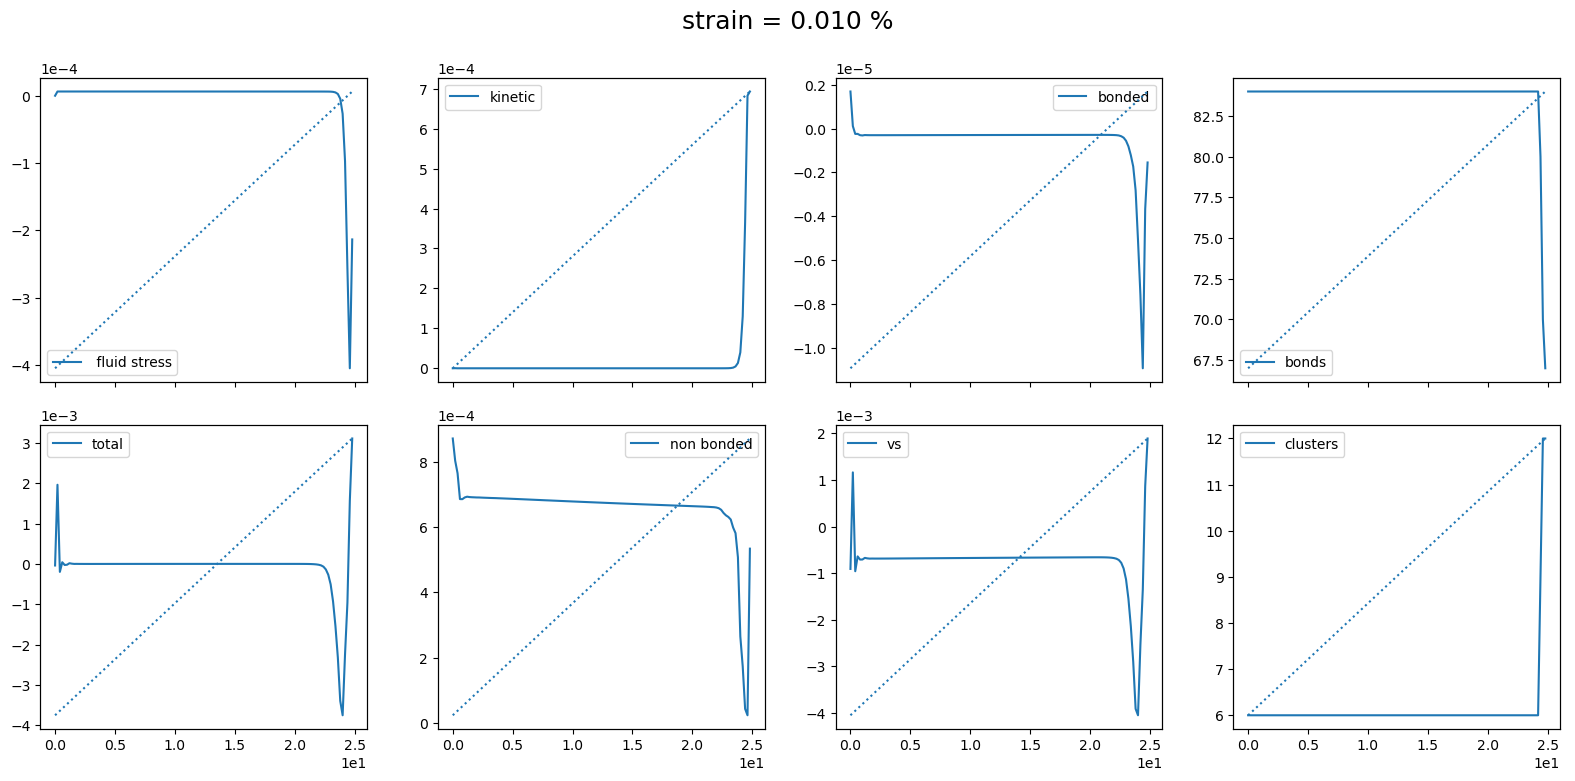

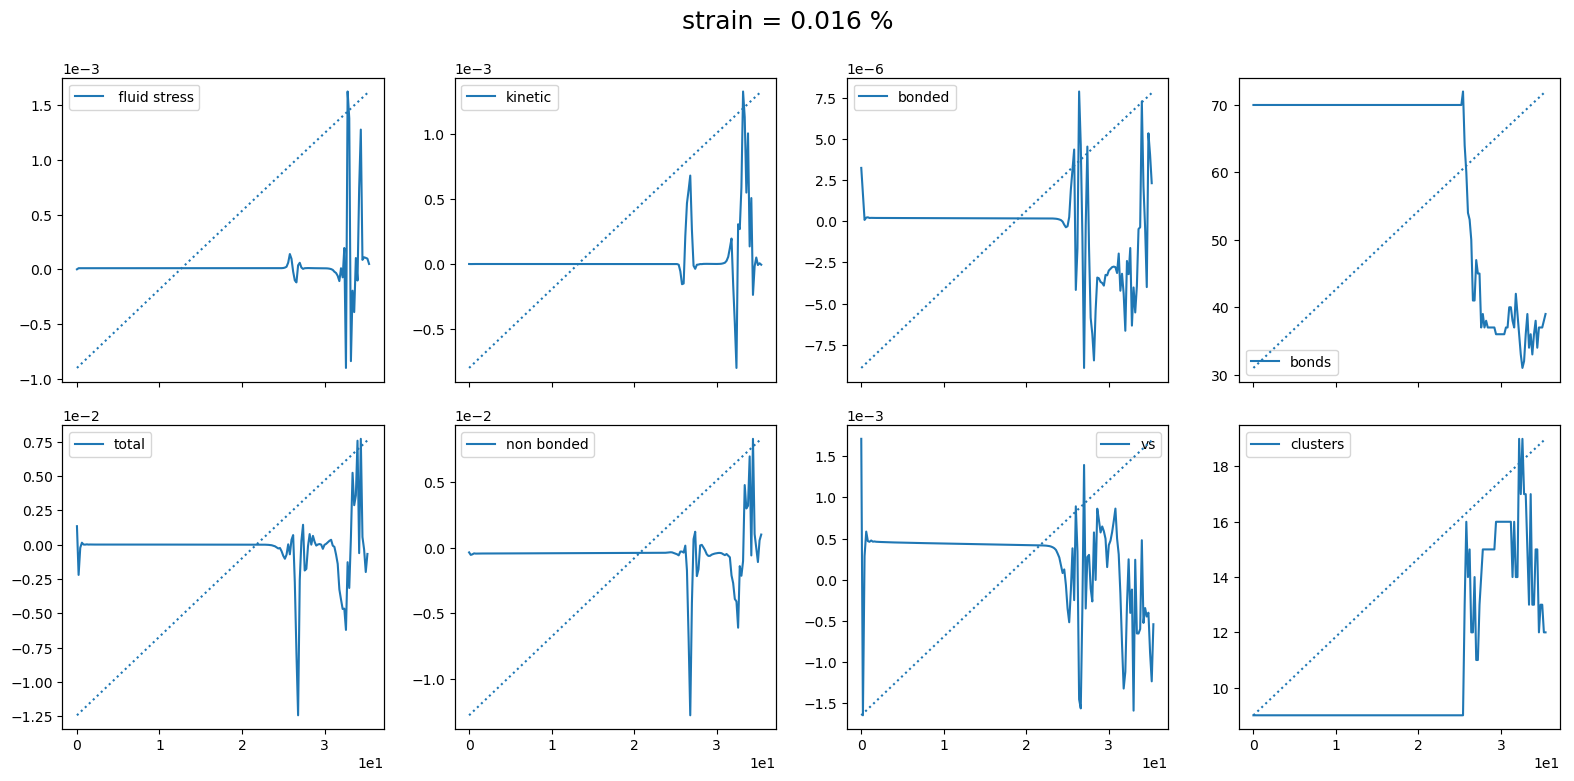

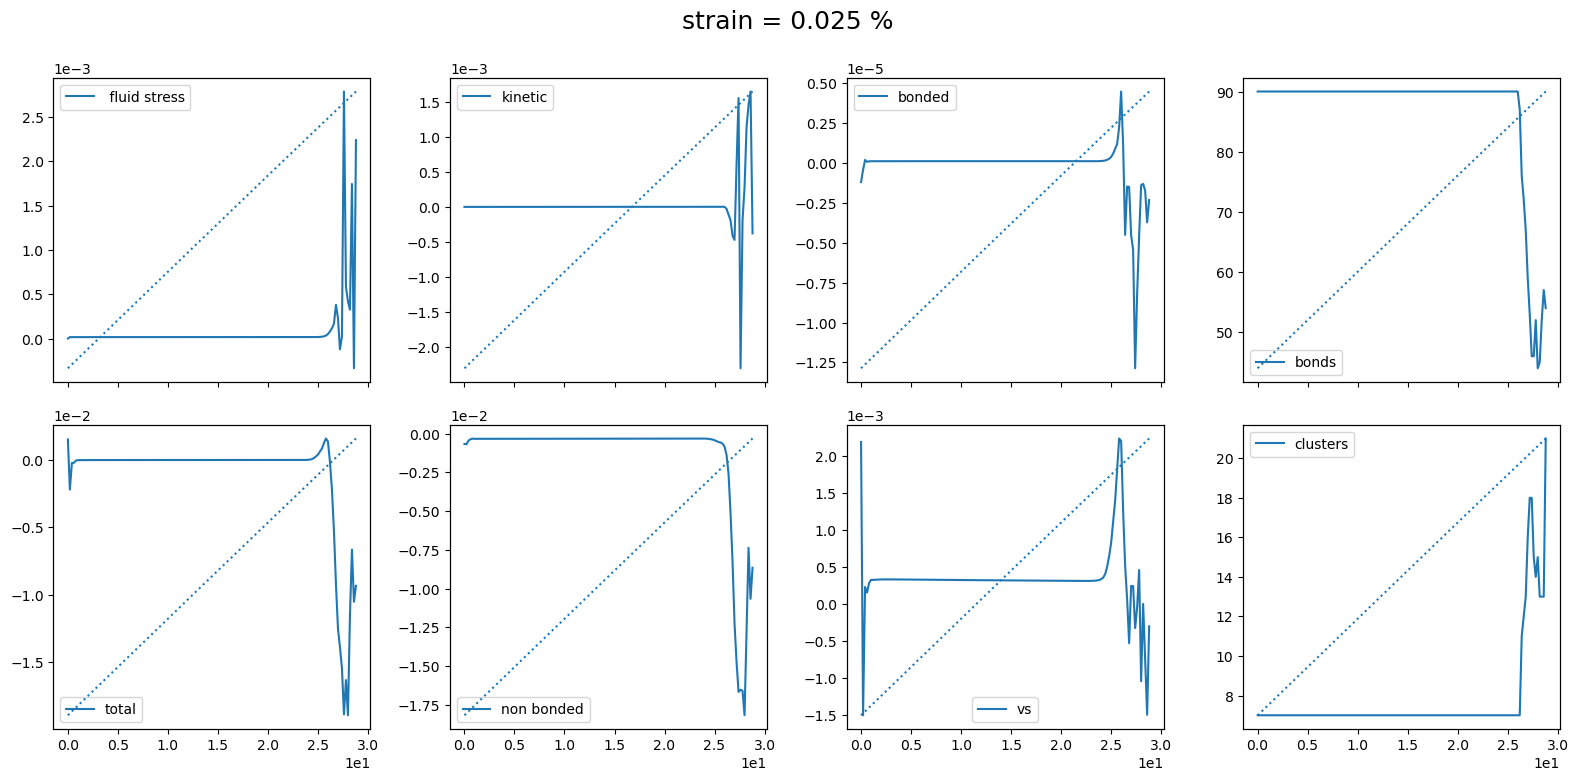

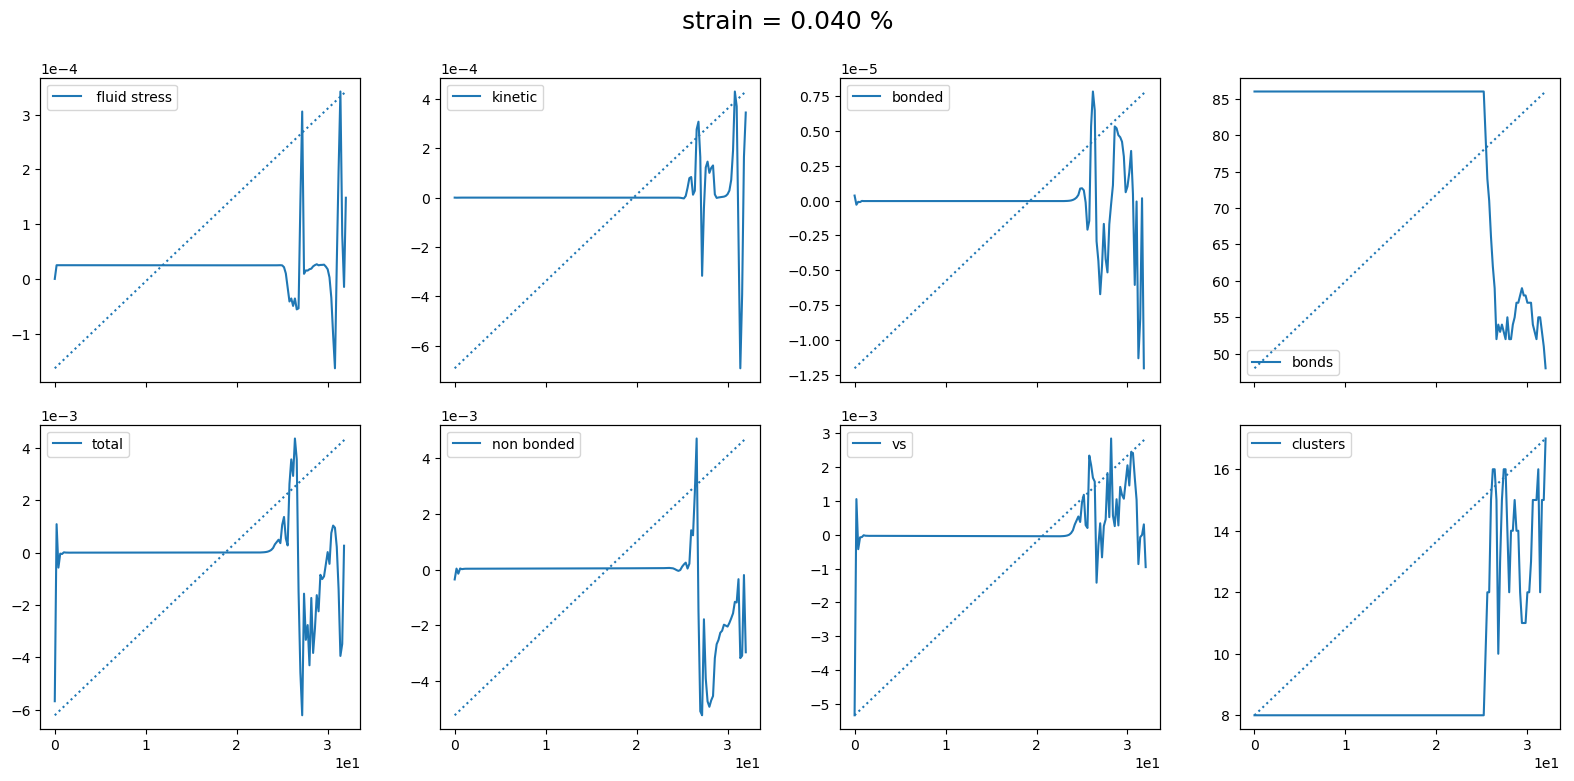

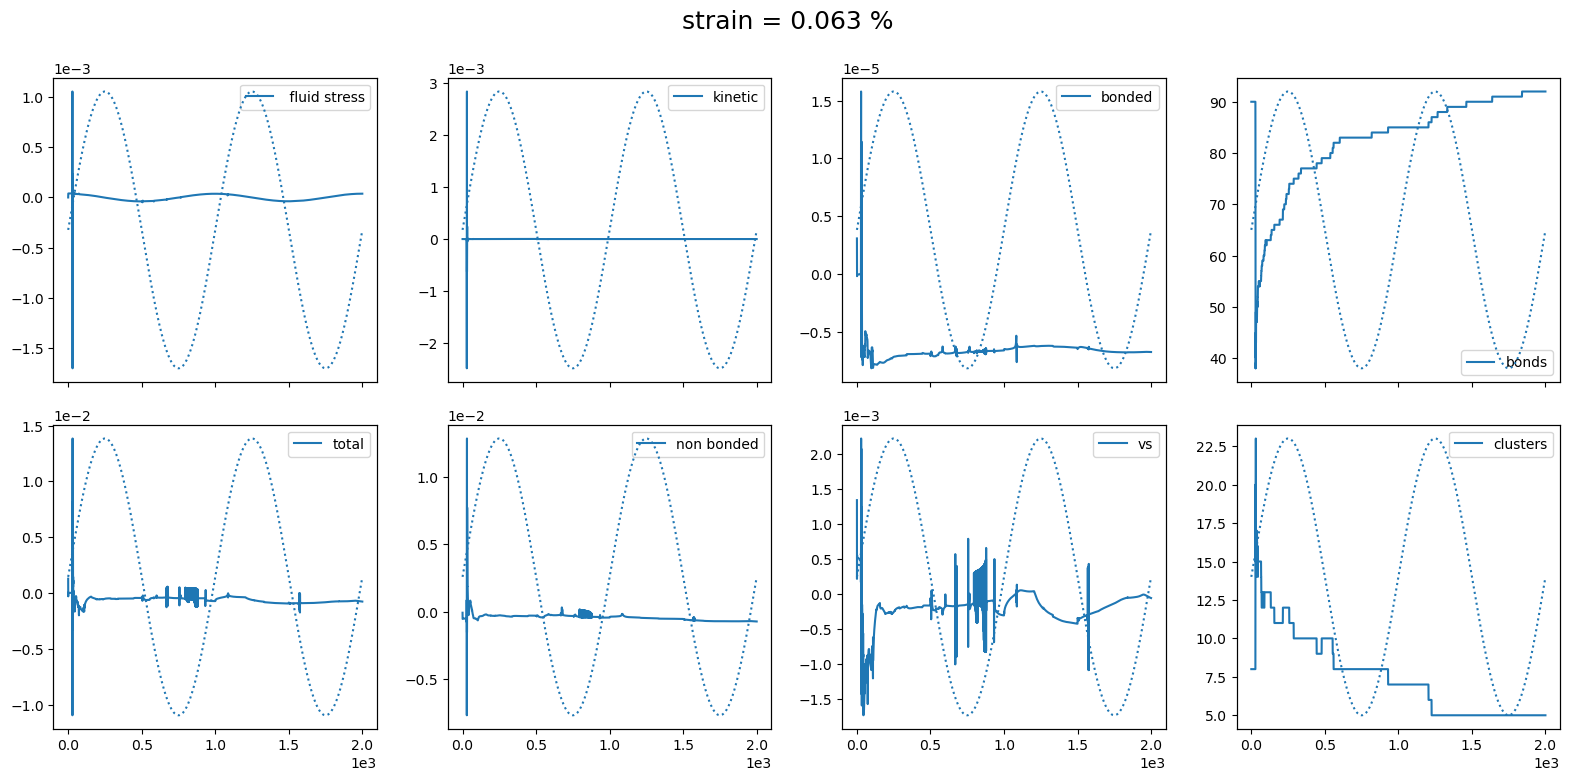

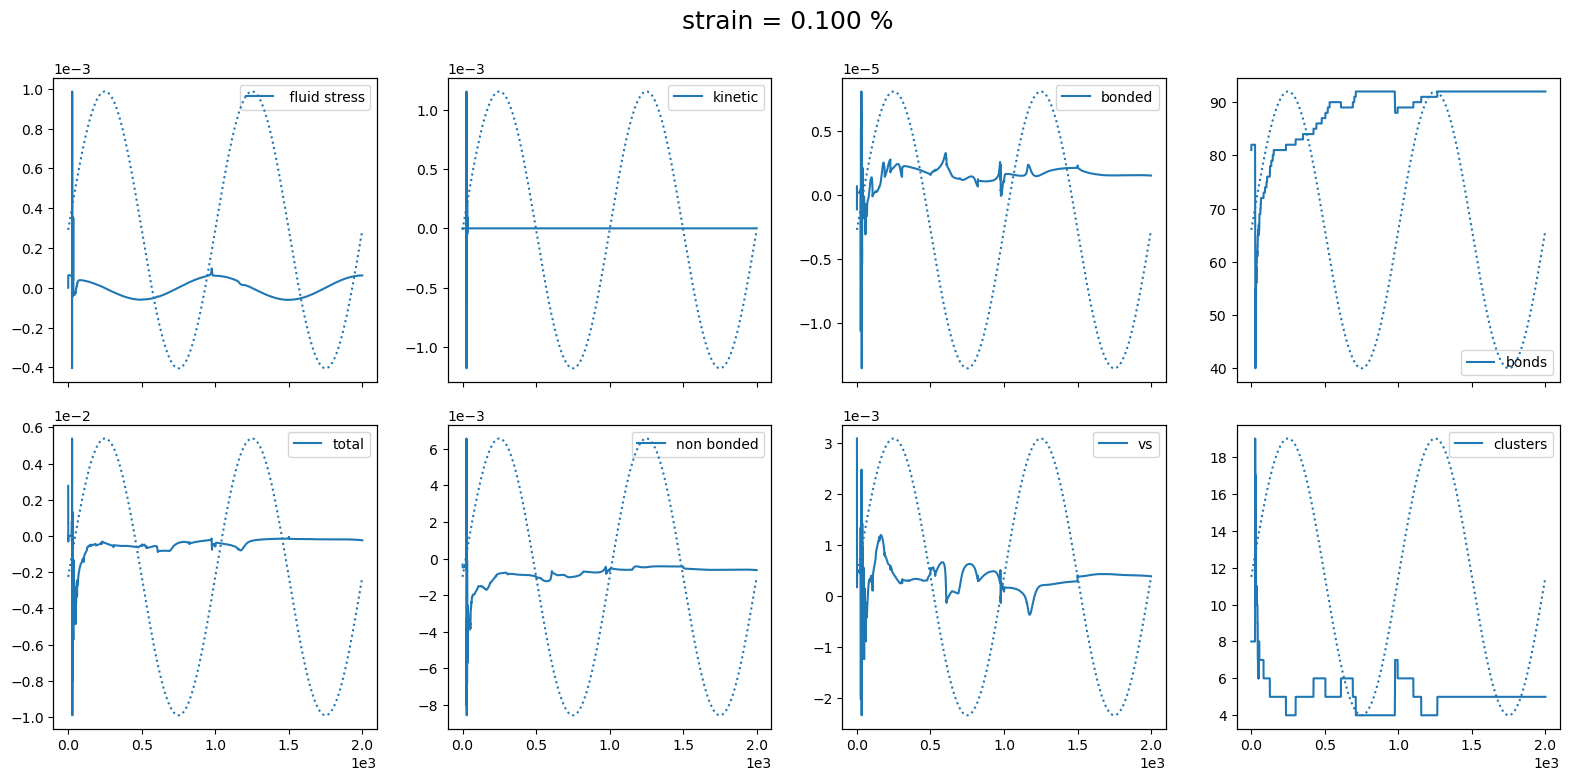

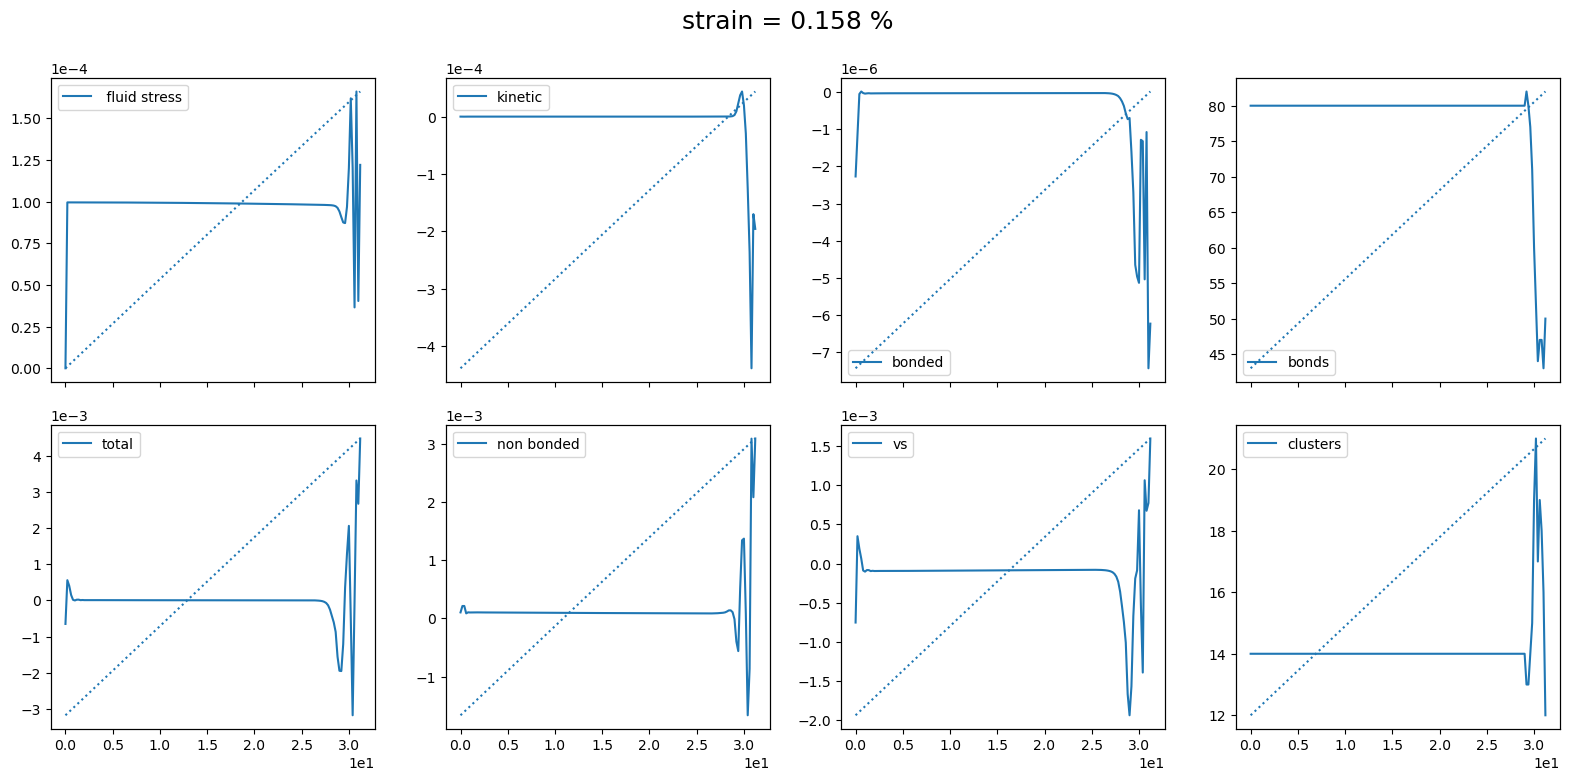

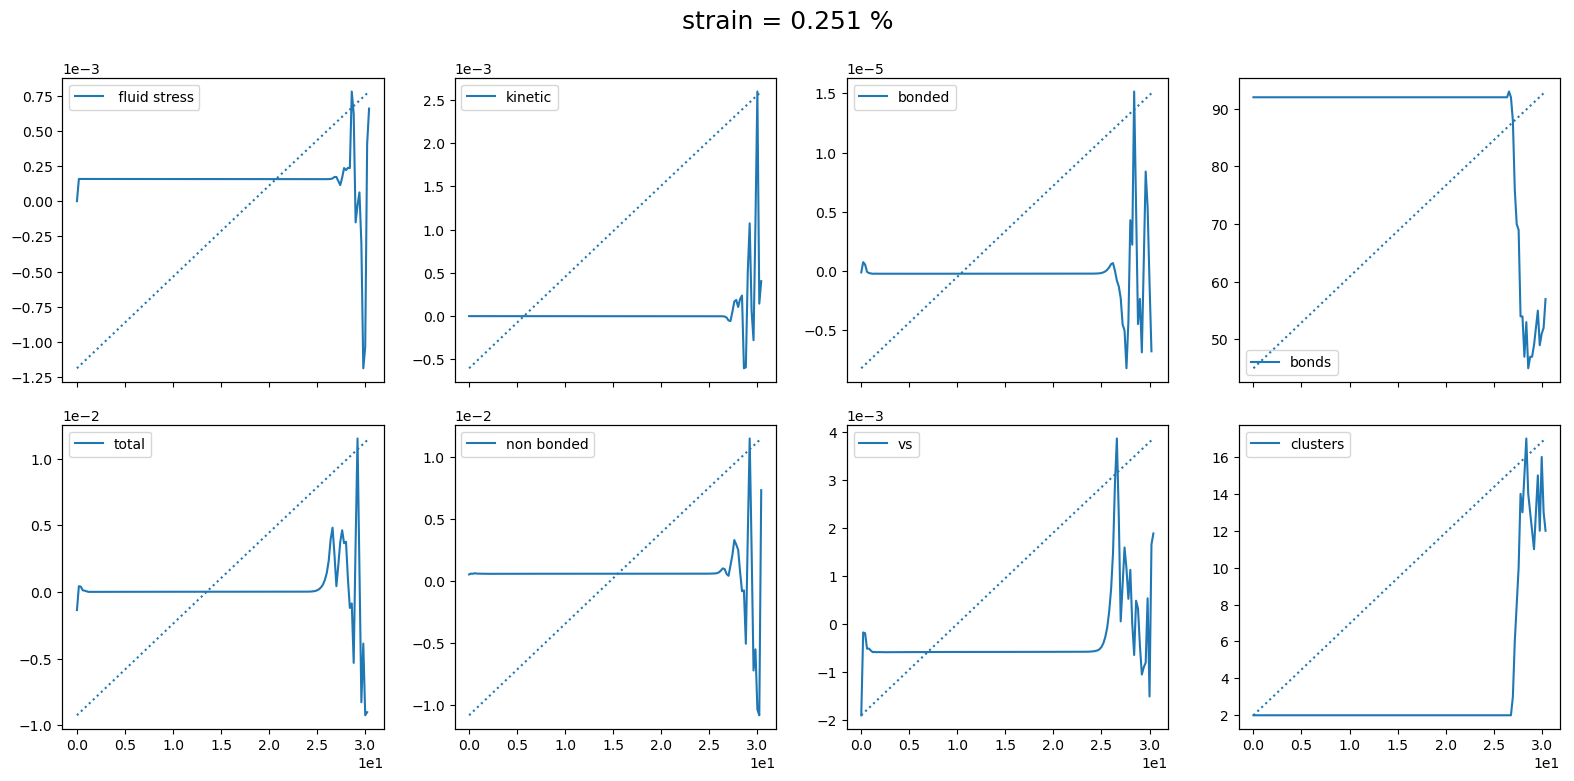

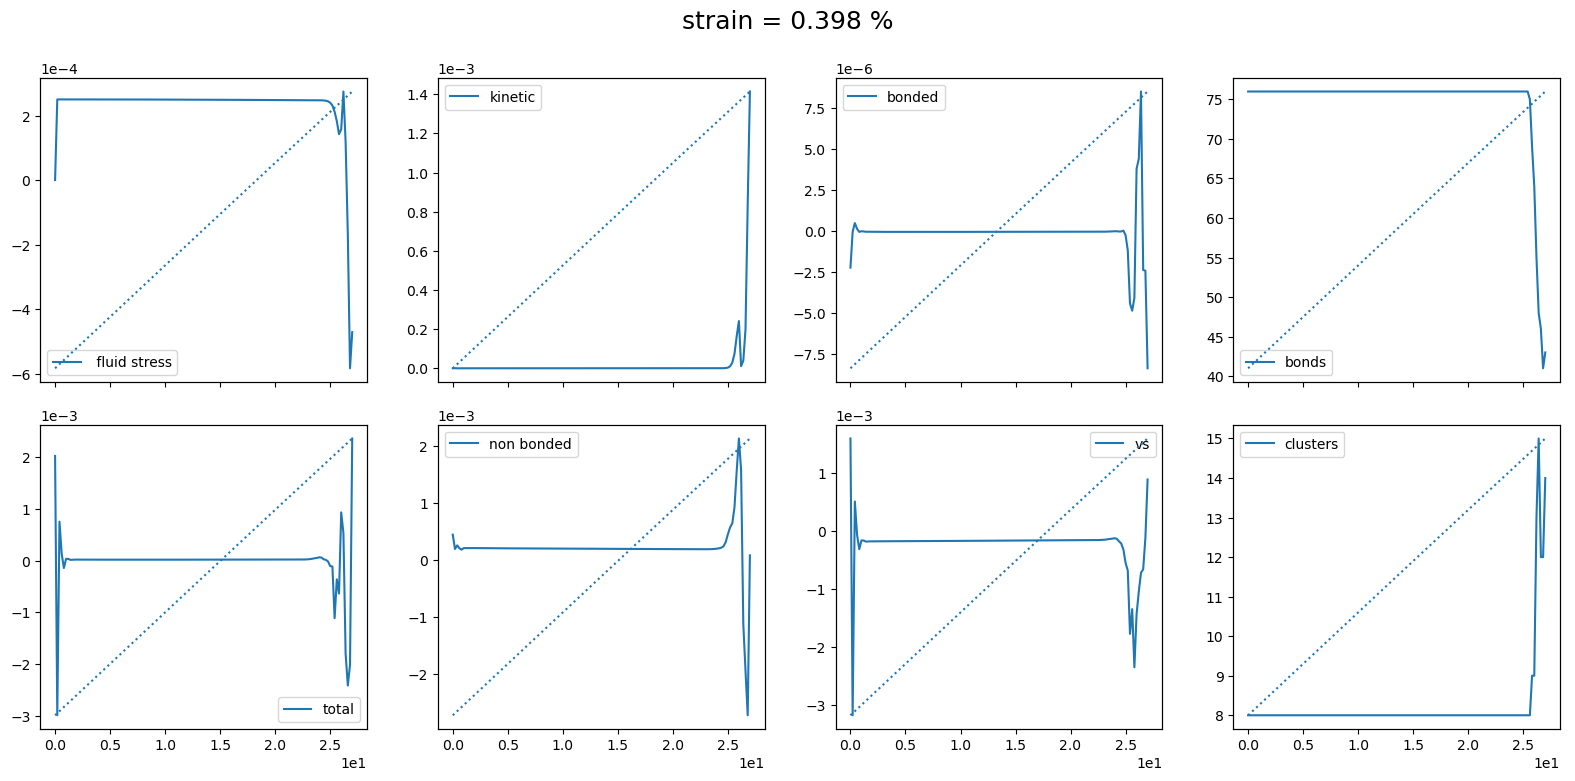

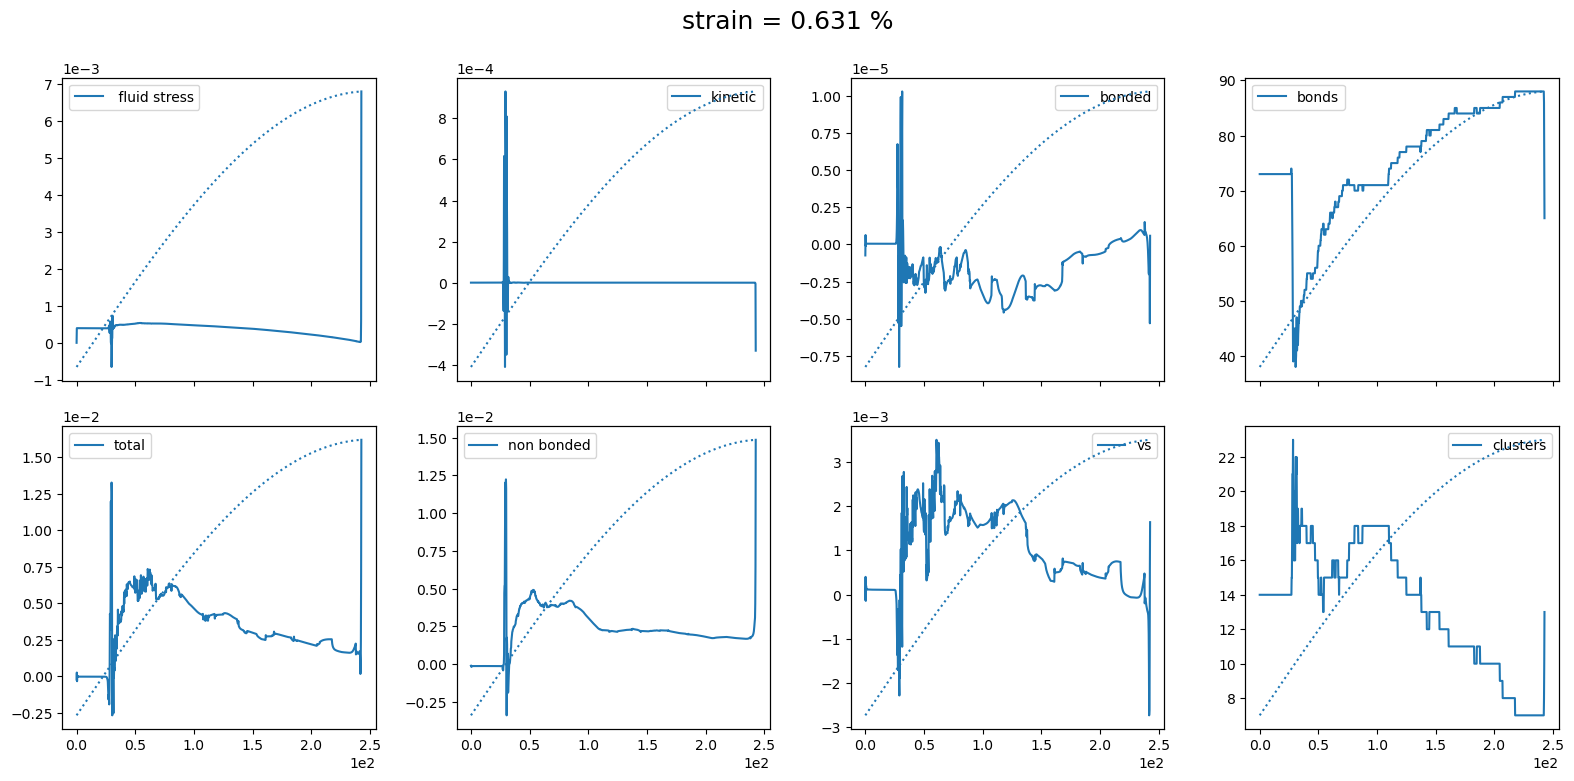

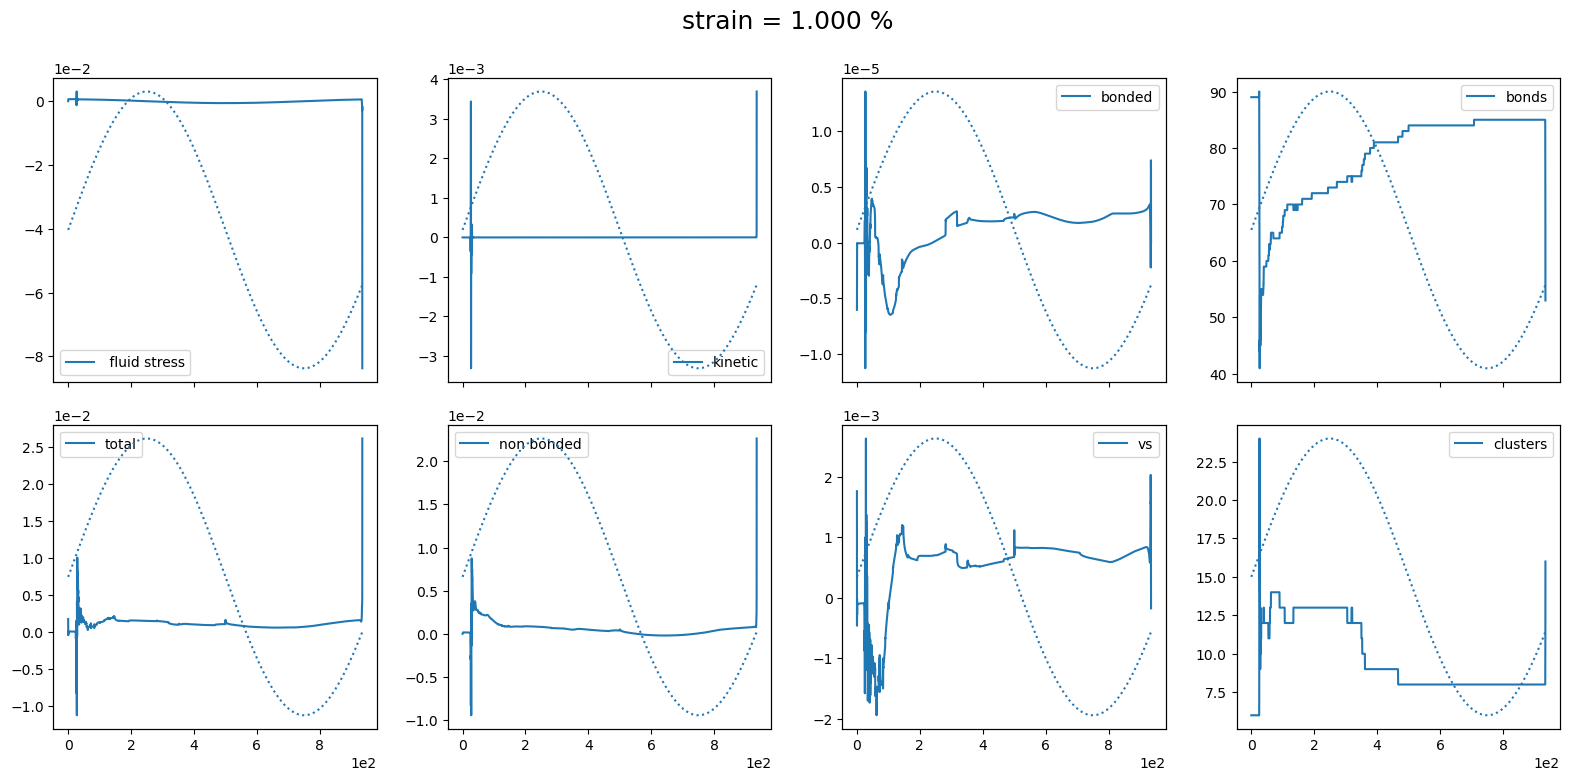

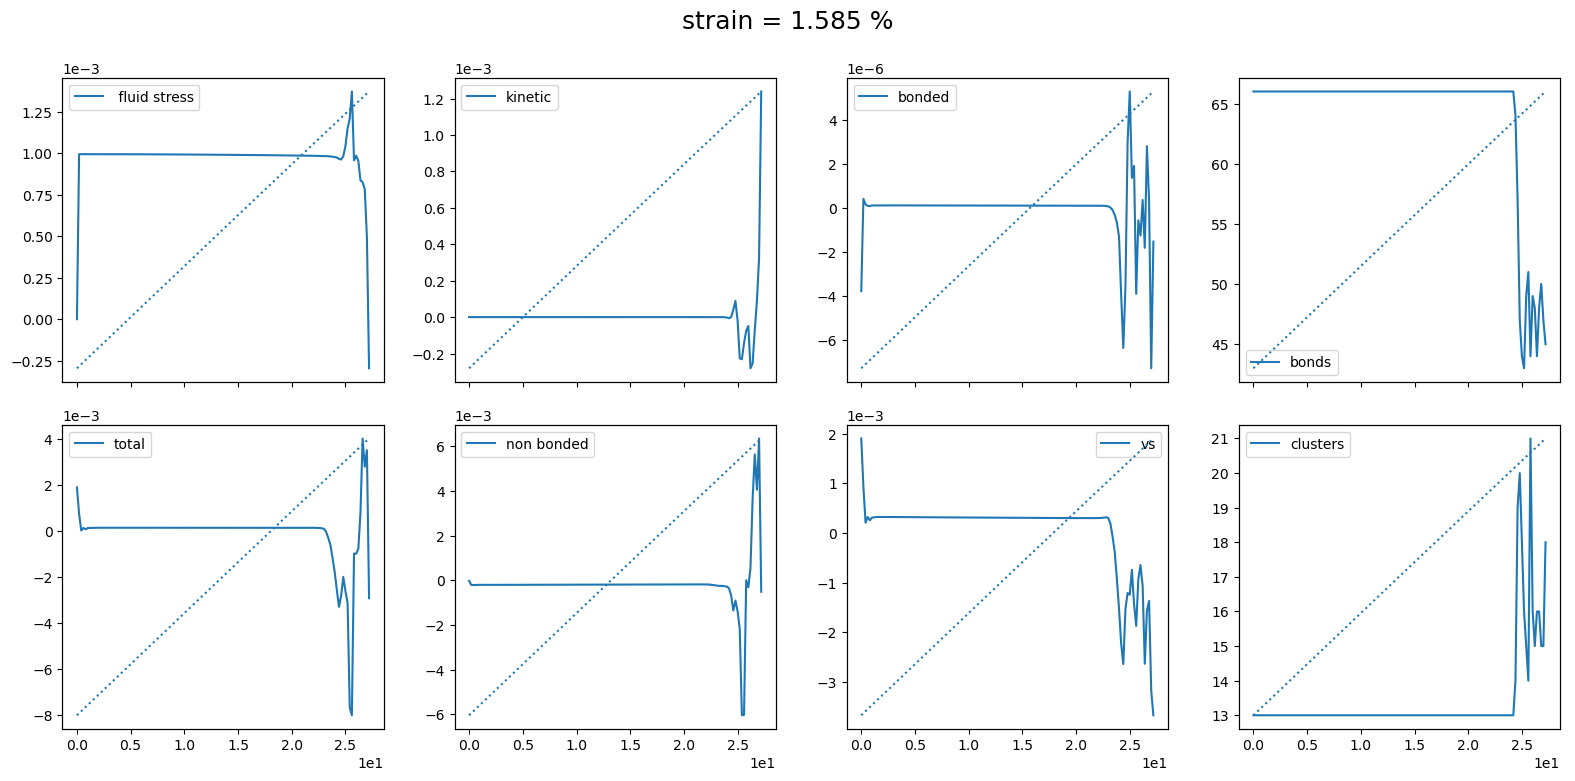

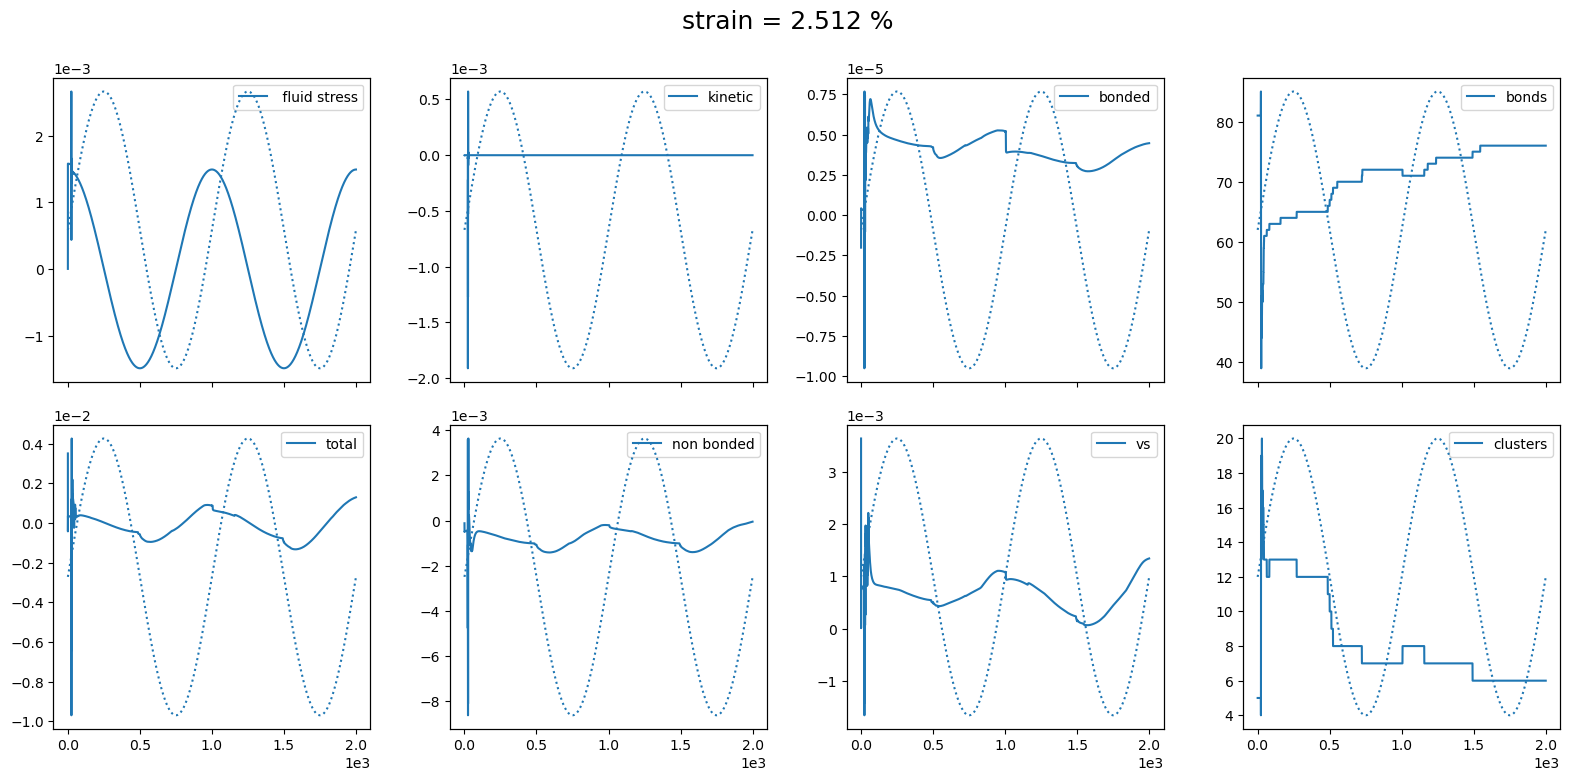

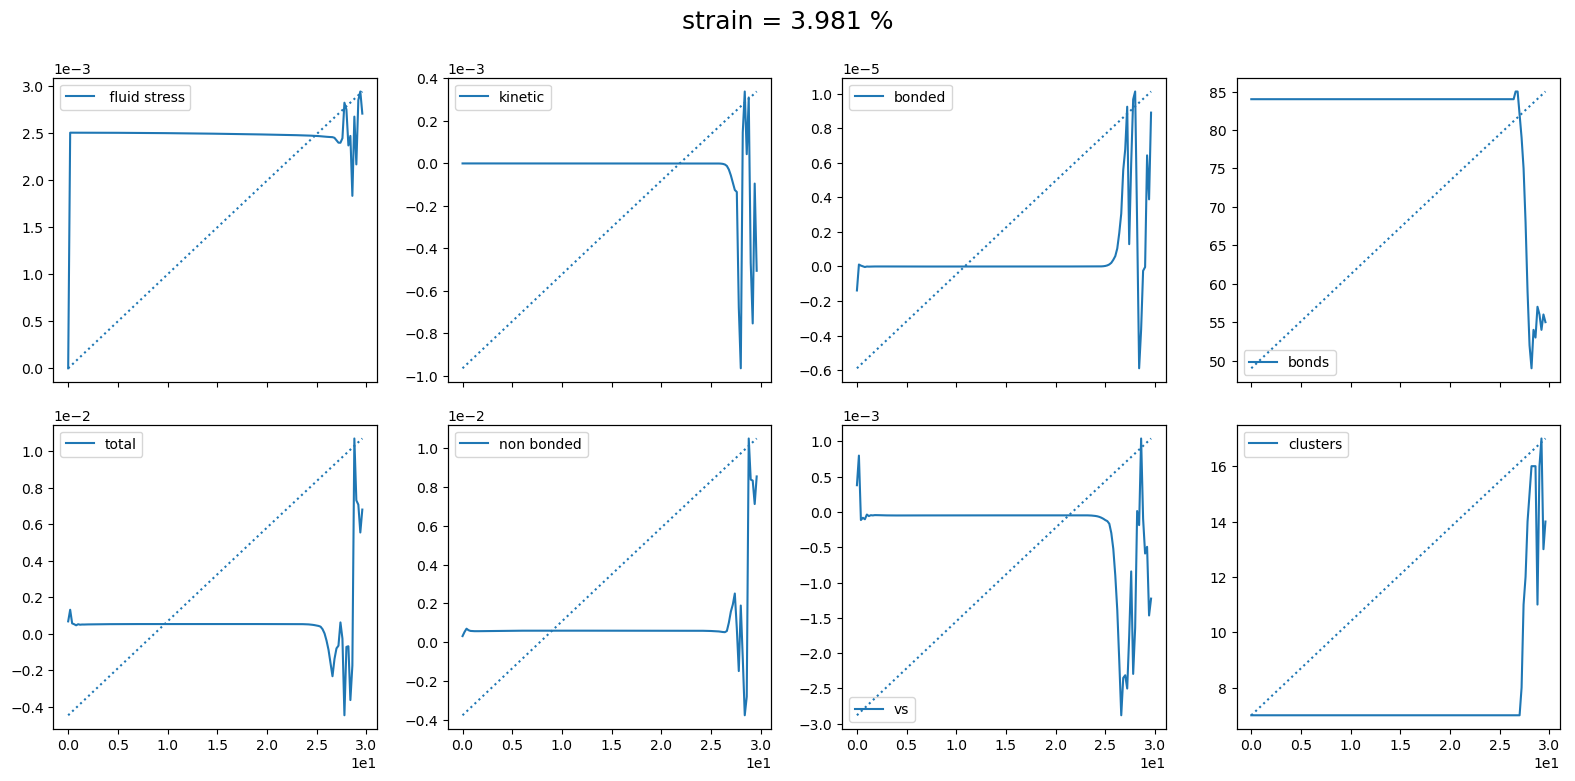

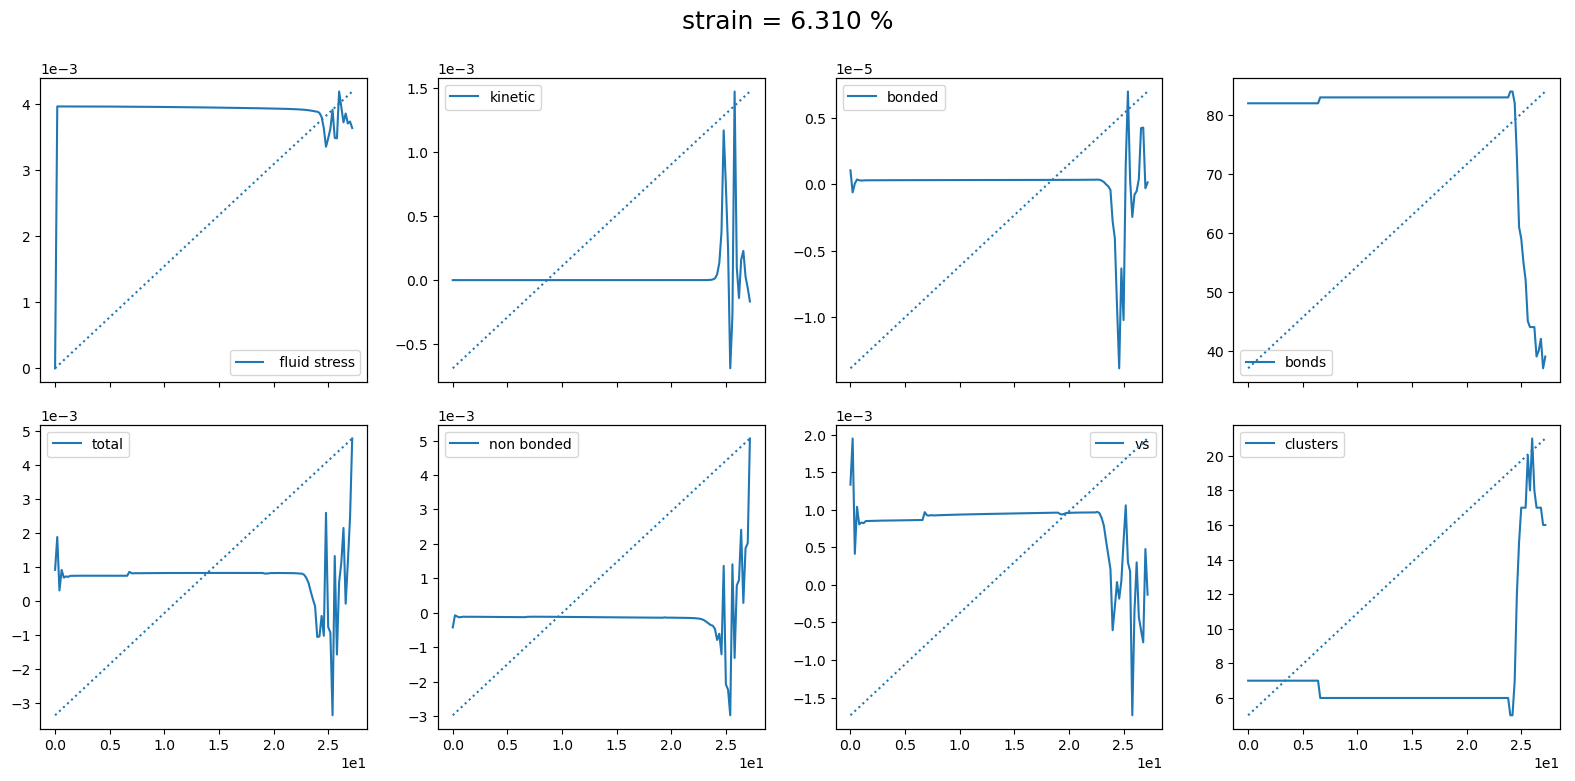

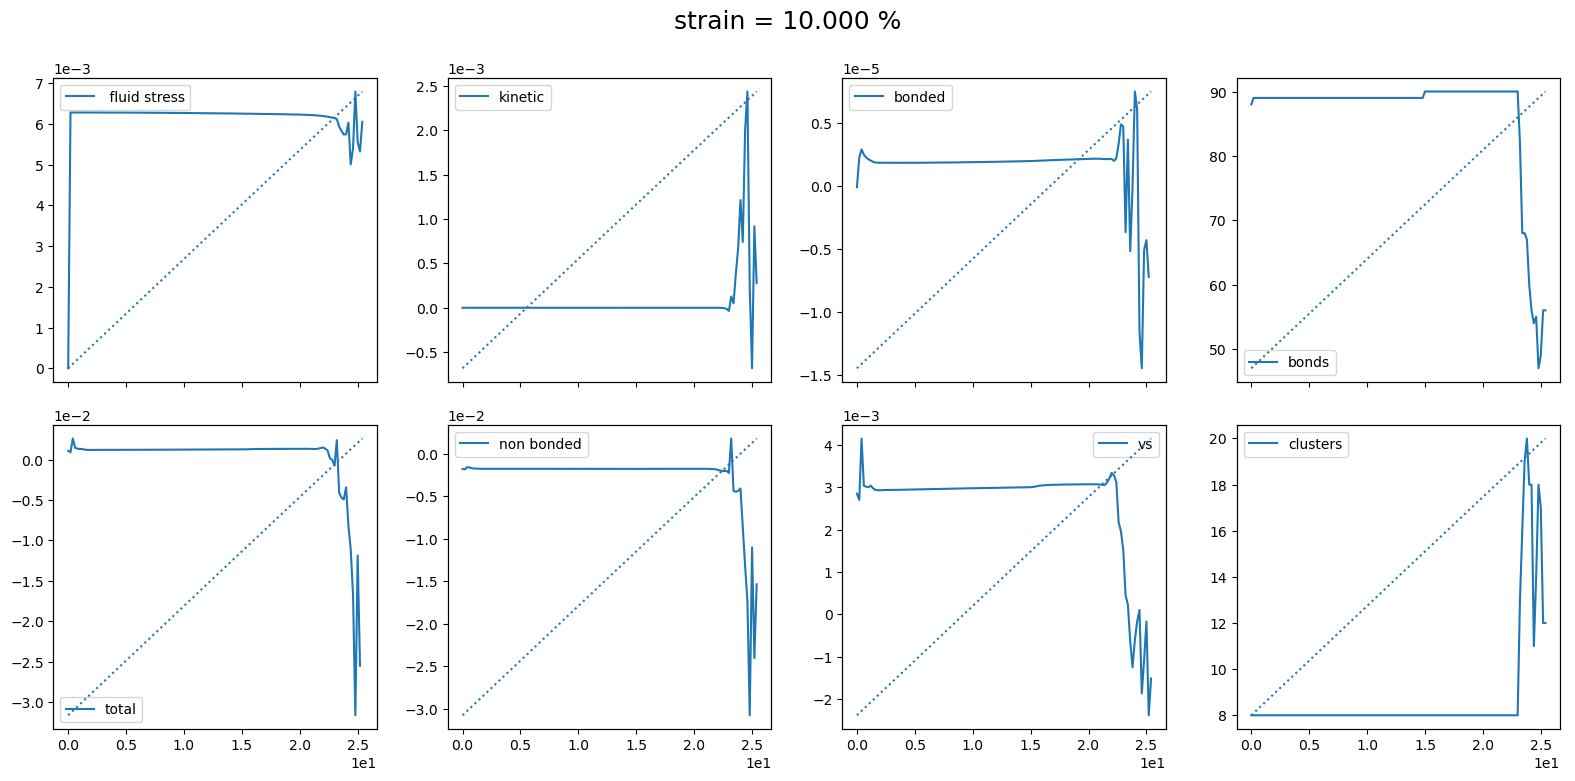

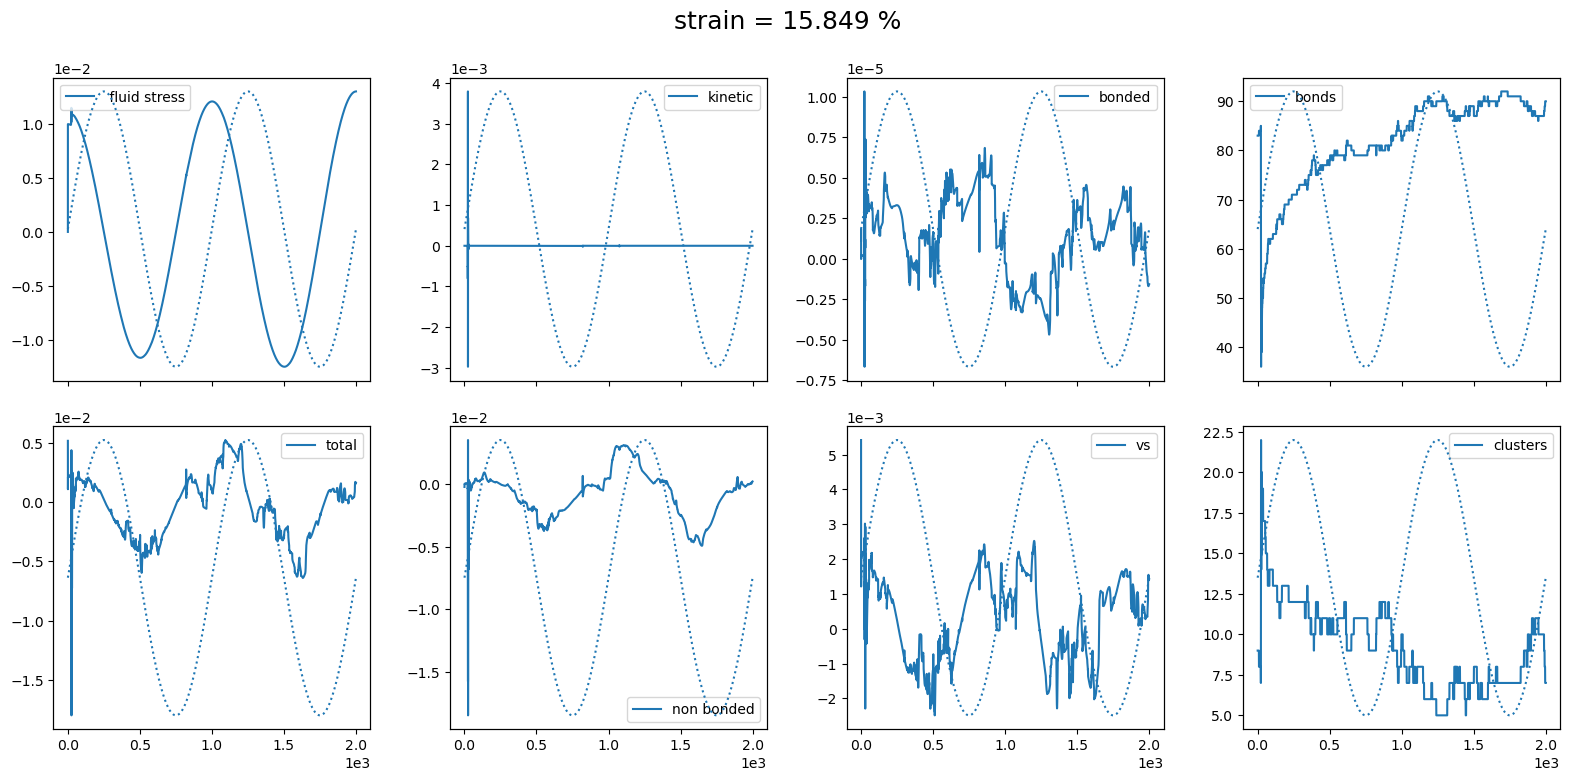

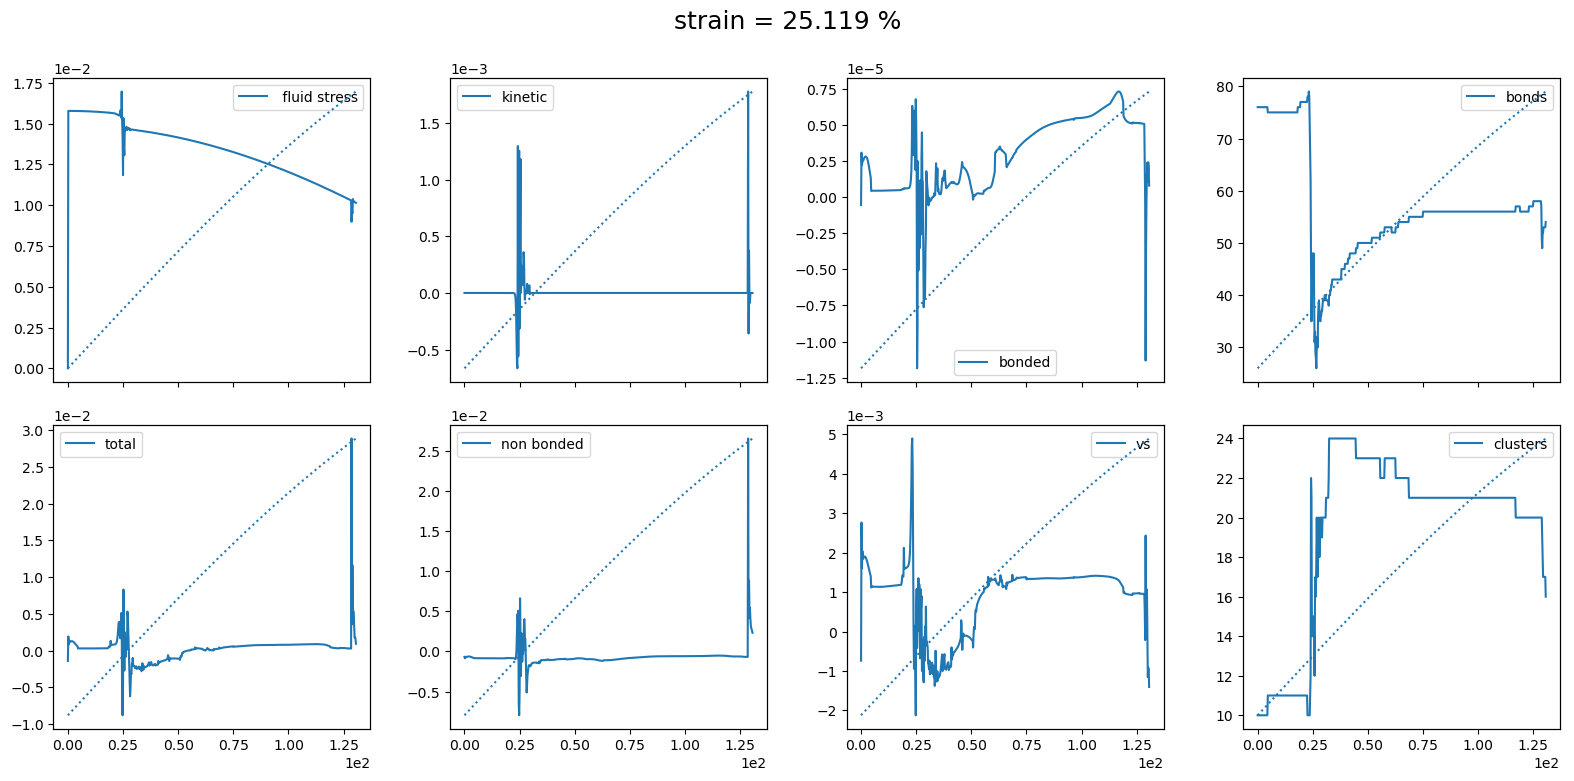

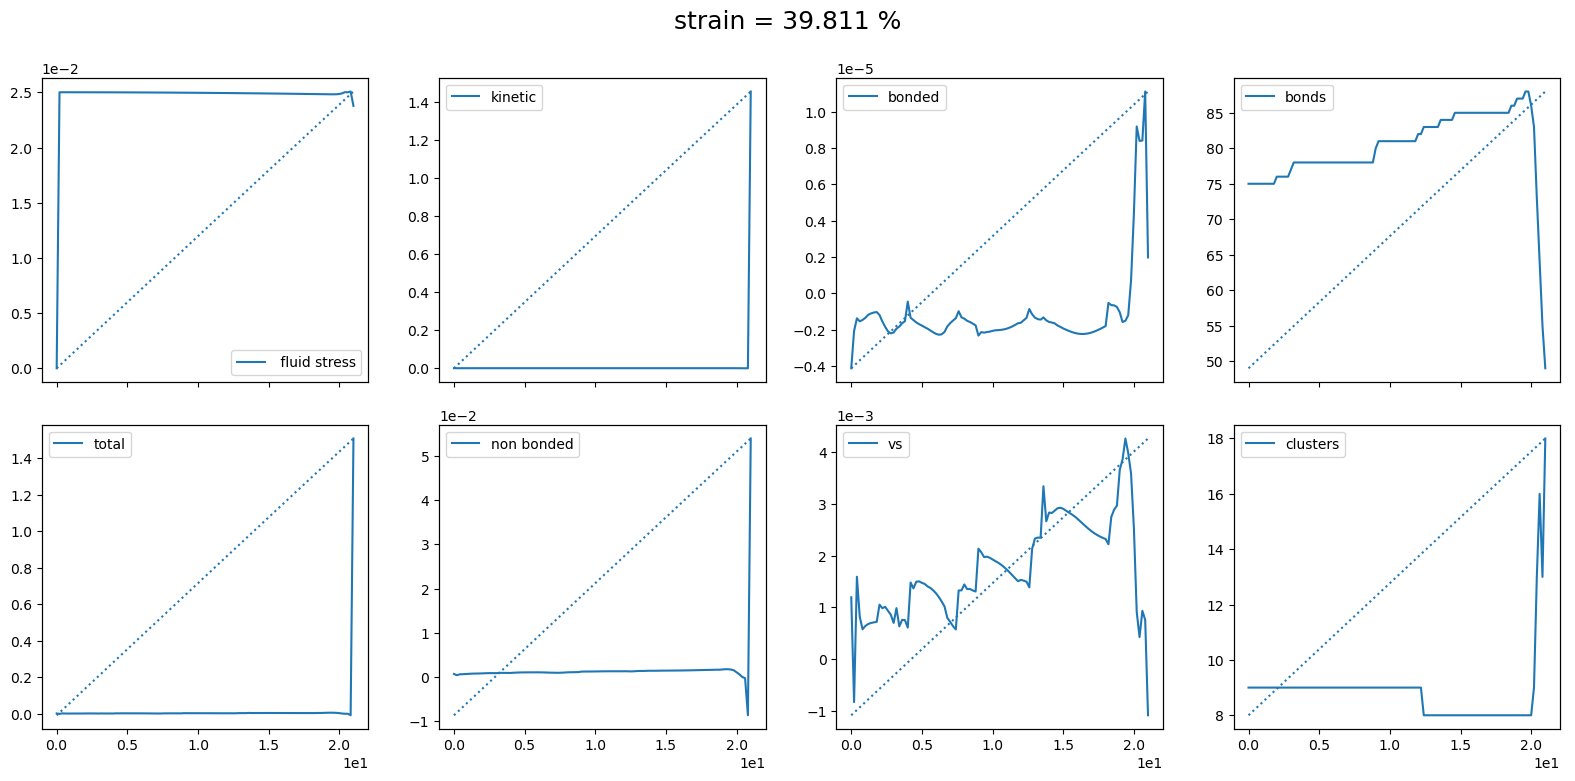

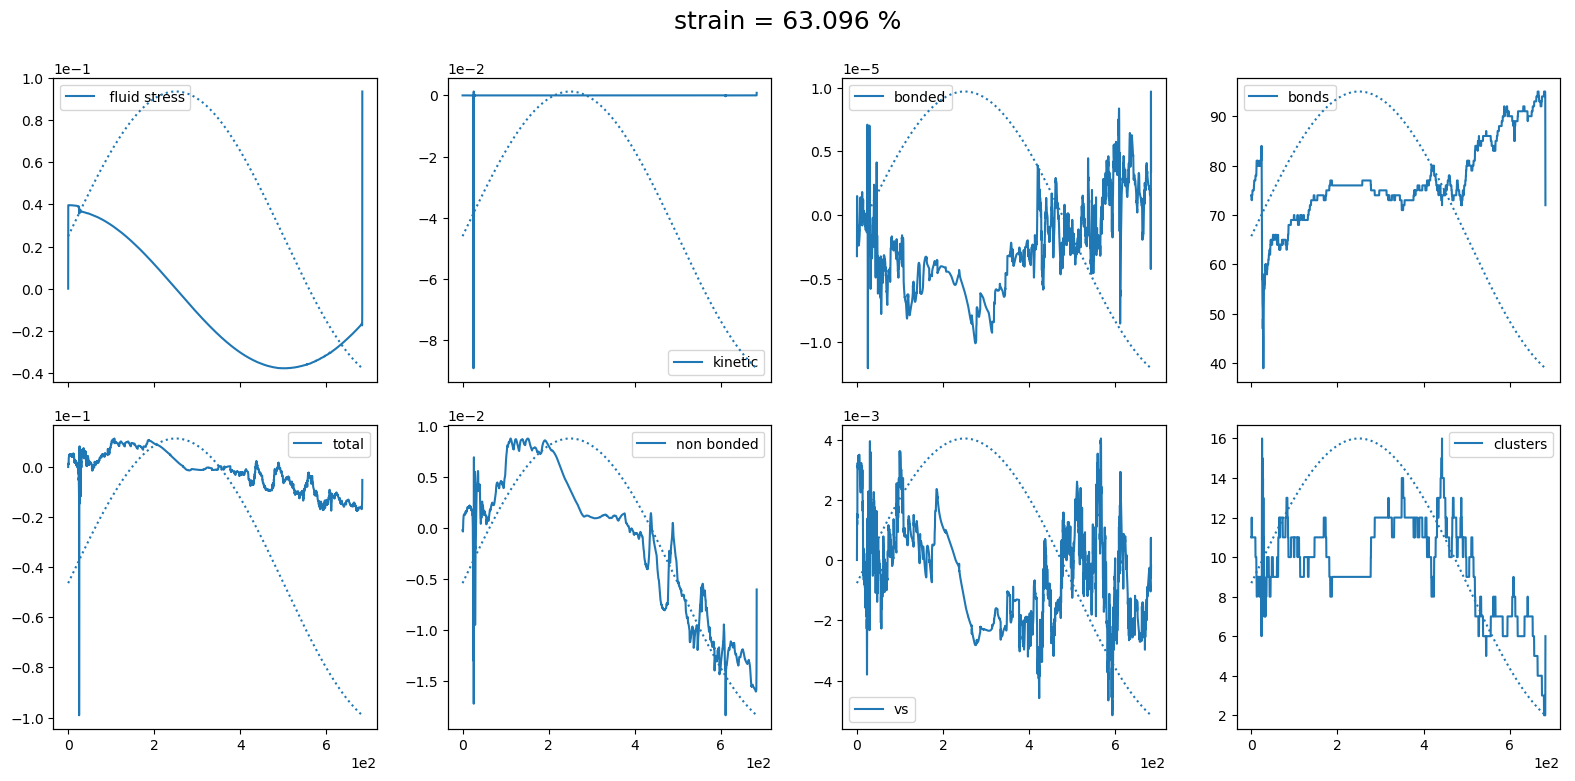

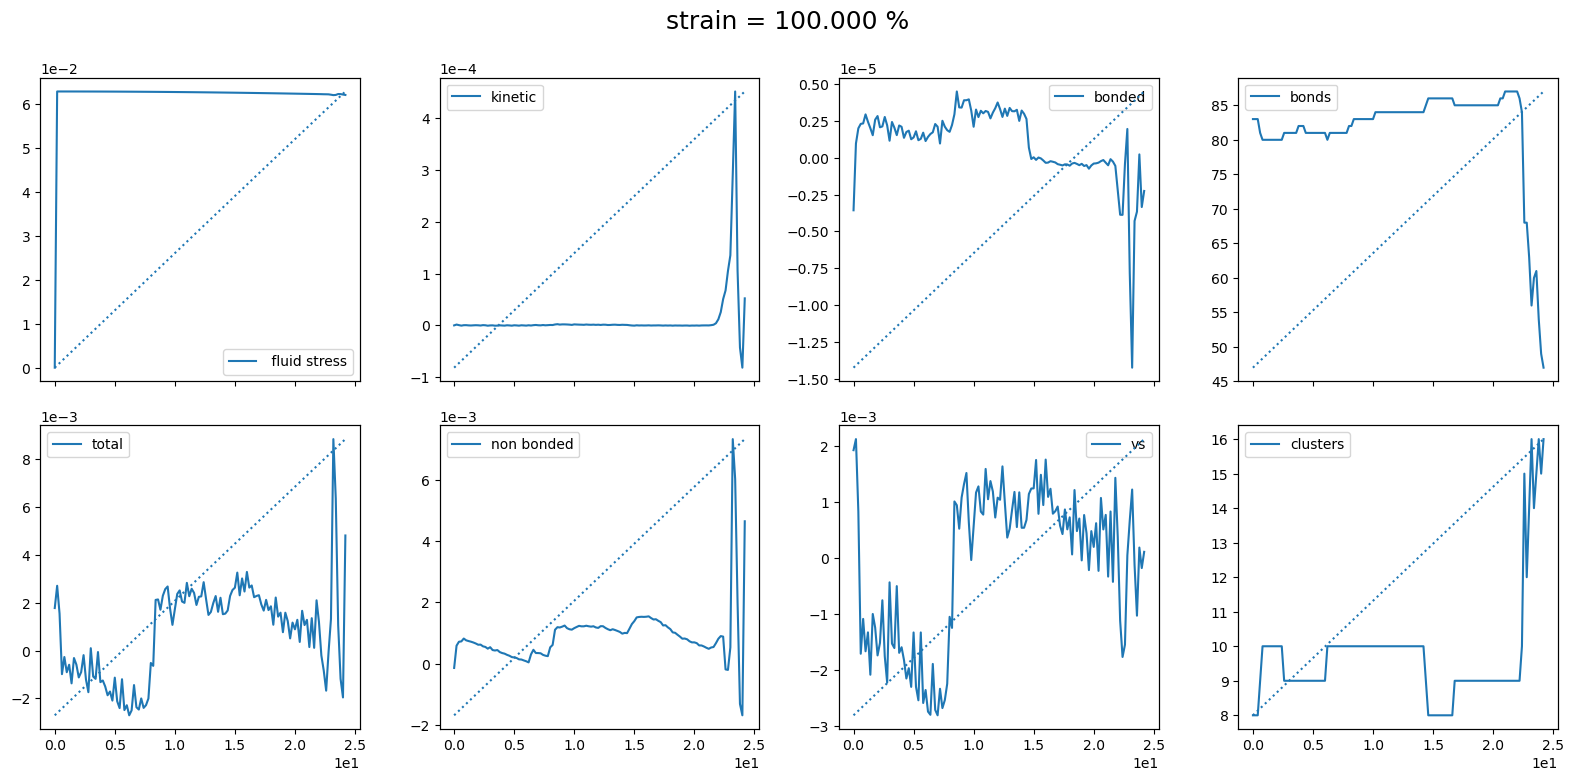

In [4]:
i = 0
for dir in dirs:
    print(dir)
    #print(glob.glob(dir + '/*'))
    
    numbers = np.genfromtxt(dir + '/numbers.dat', delimiter = ';')
    fluid_stress = np.genfromtxt(dir + '/fluid_stress.dat', delimiter = ';')
    p_stress = np.genfromtxt(dir + '/part_stress.dat', delimiter = ';')
    
    if len(np.shape(fluid_stress)) == 1:
        continue
    
    fig, axs = plt.subplots(2,4, sharex = True, figsize = (16,8))
    fig.suptitle('strain = {:.3f} %'.format(strains[i] * 100))
    
    axs[0,0].plot(fluid_stress[:,0], -fluid_stress[:,3], label = ' fluid stress')
    ax2 = axs[0,0].twinx()
    ax2.plot(fluid_stress[:,0], fluid_stress[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[0,0].legend()
    
    files = glob.glob(dir + '/p_stress_*.npy')
    files = np.sort(files)
    
    total = []
    kinetic = []
    non_bonded = []
    bonded = []
    vs = []
    
    for file in files:
        #print(file)
        p_stress_ = next(np.load(file, allow_pickle=True).flat)
        #print(p_stress_.keys())
        #print(p_stress_['total'])
        #print('kinetic', p_stress_['kinetic'][0,1])
        #print('non bonded', p_stress_['non_bonded'][0,1])
        #print('bonded', p_stress_['bonded'][0,1])
        #print('\n')
        total = np.append(total, p_stress_['total'][0,1])
        kinetic = np.append(kinetic, p_stress_['kinetic'][0,1])
        non_bonded = np.append(non_bonded, p_stress_['non_bonded'][0,1])
        bonded = np.append(bonded, p_stress_['bonded'][0,1])
        vs = np.append(vs, p_stress_['virtual_sites'][0,1])
    
    idx = np.minimum(len(total), len(p_stress))
    
    #axs[1,0].plot(p_stress[:,0], p_stress[:,3], label = 'stress')
    #axs[1,0].plot(p_stress[:,0], p_stress[:,5], label = 'stress')
    
    axs[1,0].plot(p_stress[:idx,0], total, label = 'total')
    ax2 = axs[1,0].twinx()
    ax2.plot(p_stress[:,0], p_stress[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[1,0].legend()
    #axs[1,0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    
    axs[0,1].plot(p_stress[:idx,0], kinetic, label = 'kinetic')
    ax2 = axs[0,1].twinx()
    ax2.plot(p_stress[:,0], p_stress[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[0,1].legend()
    
    axs[1,1].plot(p_stress[:idx,0], non_bonded, label = 'non bonded')
    ax2 = axs[1,1].twinx()
    ax2.plot(p_stress[:,0], p_stress[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[1,1].legend()
    
    axs[0,2].plot(p_stress[:idx,0], bonded, label = 'bonded')
    ax2 = axs[0,2].twinx()
    ax2.plot(p_stress[:,0], p_stress[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[0,2].legend()
    
    axs[1,2].plot(p_stress[:idx,0], vs, label = 'vs')
    ax2 = axs[1,2].twinx()
    ax2.plot(p_stress[:,0], p_stress[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[1,2].legend()
    
    axs[0,3].plot(numbers[:,0], numbers[:,2], label = 'bonds')
    ax2 = axs[0,3].twinx()
    ax2.plot(numbers[:,0], numbers[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[0,3].legend()
    
    axs[1,3].plot(numbers[:,0], numbers[:,3], label = 'clusters')
    ax2 = axs[1,3].twinx()
    ax2.plot(numbers[:,0], numbers[:,1], ':', label = 'deformation')
    ax2.get_yaxis().set_visible(False)
    axs[1,3].legend()
    
    axs[0,0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    axs[0,1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    axs[0,2].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    axs[1,0].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    axs[1,1].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    axs[1,2].ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
    
    fig.tight_layout()
    
    i += 1